# MMDetection Tutorial

Welcome to MMDetection! This is the official colab tutorial for using MMDetection. In this tutorial, you will learn
- Perform inference with a MMDet detector.
- Train a new detector with a new dataset.

Let's start!

In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

In [2]:
config_file = '../configs/retinanet/retinanet_r50_fpn_1x_coco.py'  #faster_rcnn_r50_fpn_1x_coco.py
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: https://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth
checkpoint_file = '../checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth' # faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: ../checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth


In [4]:
# test a single image
img = '../demo/demo.jpg'
result = inference_detector(model, img)

/home/johan/miniconda3/envs/openmmlab/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


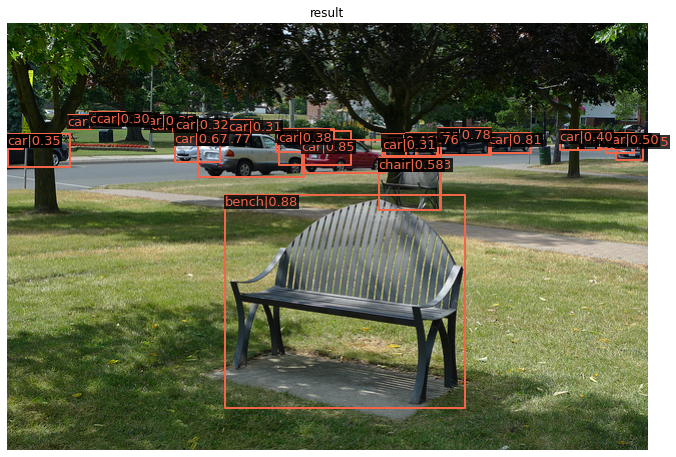

In [5]:
# show the results
show_result_pyplot(model, img, result)

In [ ]:
# python tools/analysis_tools/benchmark.py configs/retinanet/retinanet_r50_fpn_1x_coco.py checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth --launcher pytorch --log-interval 50 --fuse-conv-bn

In [ ]:
python tools/test.py \
    configs/retinanet/retinanet_r50_fpn_1x_coco.py \
    checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth \
    --out results.pkl \
    --eval bbox segm
    --show

    

loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
load checkpoint from local path: checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5000/5000, 3.8 task/s, elapsed: 1324s, ETA:     0s
writing results to results.pkl

Evaluating bbox...
Loading and preparing results...
DONE (t=1.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=55.74s).
Accumulating evaluation results...
DONE (t=11.12s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.365
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.554
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.391
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.403
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.481
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.336
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.584
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.691